<a href="https://colab.research.google.com/github/riyabhatnagar021/Who_am_I/blob/master/Who_am_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential,Model
from keras.layers import Convolution2D,MaxPooling2D,ZeroPadding2D,Dropout,Flatten,Activation



Using TensorFlow backend.


# This is Deep Face Model

In [2]:
model=Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

W0825 18:30:56.457006 140194742380416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 18:30:56.502675 140194742380416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 18:30:56.521372 140194742380416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 18:30:56.583181 140194742380416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0825 18:30:56.779344 140194742380416 deprecation_wrapp

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from keras.models import model_from_json
model.load_weights('drive/My Drive/vgg_face_weights.h5')

W0825 18:31:44.701038 140194742380416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [0]:
vgg_face_descriptor = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [0]:
from keras.preprocessing import image
import cv2

In [0]:

def process_image(image_path):
  
  img_size=224
  img_array=cv2.imread(image_path,cv2.IMREAD_COLOR)
  
  new_array=cv2.resize(img_array,(img_size,img_size))
  
  we=new_array.reshape(-1,img_size,img_size,3)
  
  
  return we



In [0]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

# The Database

In [0]:
database = {}
path='drive/My Drive/project_data/image_data'
database["priyanka"] =vgg_face_descriptor.predict(process_image('drive/My Drive/project_data/image_data/p1.jpg'))[0,:]
database["cristiano"] =vgg_face_descriptor.predict(process_image('drive/My Drive/project_data/image_data/c1.jpg'))[0,:]
database["taylor"] =vgg_face_descriptor.predict(process_image('drive/My Drive/project_data/image_data/t1.jpg'))[0,:]

database["riya"] =vgg_face_descriptor.predict(process_image('drive/My Drive/project_data/image_data/r1.jpg'))[0,:]
database["ashish"] =vgg_face_descriptor.predict(process_image('drive/My Drive/project_data/image_data/a1.jpg'))[0,:]




# Face Verification
 
 **what is it:**

"is this the claimed person?". For example, at some airports, you can pass through customs by letting a system scan your passport and then verifying that you (the person carrying the passport) are the correct person. A mobile phone that unlocks using your face is also using face verification. This is a 1:1 matching problem.


In [0]:
epsilon = 0.40 #cosine similarity
#epsilon = 120 #euclidean distance
 
def verifyFace(img1, img2):
 img1_representation = vgg_face_descriptor.predict(process_image(img1))[0,:]
 img2_representation = vgg_face_descriptor.predict(process_image(img2))[0,:]
 
 cosine_similarity = findCosineDistance(img1_representation, img2_representation)
 euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
 
 if(cosine_similarity < epsilon):
  print("verified... they are same person")
 else:
  print("unverified! they are not same person!")

In [0]:
import numpy as np
import matplotlib.pyplot as plt

verified... they are same person


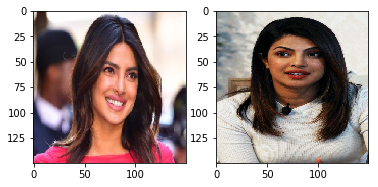

In [25]:
def prepare(image_path):
  
  img_size=224
  img_array=cv2.imread(image_path,cv2.IMREAD_COLOR)
  
  new_array=cv2.resize(img_array,(img_size,img_size))
  
  we=new_array.reshape(-1,img_size,img_size,3)
  
  
  return we

my_img='nobi.jpg'
my_img2='pri.jpg'


prediction=model.predict([prepare(my_img)])
prediction2=model.predict([prepare(my_img2)])

img1 = image.load_img(my_img, target_size=(150, 150))
img2 = image.load_img(my_img2, target_size=(150, 150))

# Plotting the two sample images

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)

# Verifying the two images

verifyFace(my_img,my_img2)

unverified! they are not same person!


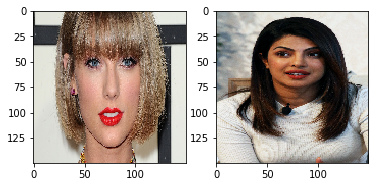

In [40]:
my_img='t1.jpg'
my_img2='pri.jpg'

img1 = image.load_img(my_img, target_size=(150, 150))
img2 = image.load_img(my_img2, target_size=(150, 150))

# Plotting the two sample images

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2)

# Verifying the two images

verifyFace(my_img,my_img2)

In [29]:
for name,en in database.items():
  print(name)
  

priyanka
cristiano
taylor
riya
ashish


# Face Recognizer

**what is it:**

 "who is this person?".This is a 1:K matching problem.A face recognition system that takes as input an image, and figures out if it is one of the authorized persons (and if so, who). 

In [0]:
epsilon = 0.40 #cosine similarity

 
def verify(img1_representation, img2,name):
  
#   img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
  img2_representation = vgg_face_descriptor.predict(process_image(img2))[0,:]
#   print(img2_representation.shape)
 
  cosine_similarity = findCosineDistance(img1_representation, img2_representation)
  euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
 
  if(cosine_similarity < epsilon):
    print("It's " + str(name) + ", Welcome !"+str(cosine_similarity))
  else:
    print("It's not " + str(name) + ", please go away")

In [0]:
import matplotlib.pyplot as plt

# This checks if the person whose image is captured is the same one whose name is entered . Here its taylor

<IPython.core.display.Javascript object>

It's taylor, Welcome !0.262356698513031


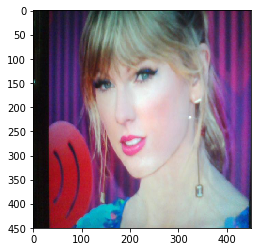

In [36]:
getPhoto()

img22='photo.jpg'

# Enter the name present on the id card
name='taylor'



name=name.lower()
c=0
for (name1, db_enc) in database.items():
  if name1 ==name:
    c=1
#     print(name1)
 

if c ==1:
  a=verify(database[name],img22,name)
  img = image.load_img(img22, target_size=(150, 150))
  plt.imshow(img)
else:
  print('Sorry not in database')

# It Recognizes the person in front of the webcam`

<IPython.core.display.Javascript object>

Hi cristiano0.5145893096923828


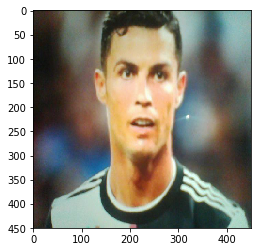

In [39]:
epsilon=0.40
getPhoto()
img22='photo.jpg'
img1_representation = vgg_face_descriptor.predict(process_image(img22))[0,:]

min_dist = 100


for (name, db_enc) in database.items():
  


  cosine_similarity = findCosineDistance(img1_representation, db_enc)
#   print(name)
  if cosine_similarity < epsilon:
    min_dist = cosine_similarity
    identity = name
  
if(min_dist < epsilon):
#     print("It's " + str(identity) + ", Welcome !")
    print("Hi " + str(identity) +str(cosine_similarity))
    img = image.load_img(img22, target_size=(450, 450))
    plt.imshow(img)

else:
    print("Sorry Not in database")

# This is the javascript code to open webcam in google colab and capture image

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image

def getPhoto():
  
  try:
    filename = take_photo()
#     print(''.format(filename))
  
    # Show the image which was just taken.
#     display(Image(filename))
  except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
    print(str(err))